# Sierpinksi Triangle - Tarea 1

(c) Thanos Drossos

18.02.2025

Este código genera y visualiza el triángulo de Sierpinski utilizando una subdivisión recursiva, mientras que también calcula y analiza diferentes métricas de distancia entre los puntos del fractal.

## 1) Construcción del Triángulo de Sierpinski y Cálculo de Distancias
El triángulo de Sierpinski se genera dividiendo repetidamente un triángulo equilátero en sub-triángulos más pequeños. La función clave para esto es `subdivide_triangle()`, que toma un triángulo y genera tres sub-triángulos nuevos al calcular los puntos medios de sus lados.

### Métricas de Distancia
Una vez que el triángulo es construido, el código analiza las distancias entre sus puntos utilizando cuatro métricas distintas:

#### **1. Distancia Euclidiana** (`distance_euclid(p1, p2)`)
- Es la distancia en línea recta entre dos puntos \((x_1, y_1)\) y \((x_2, y_2)\), calculada como:

  \[
  d = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}
  \]

- Es la distancia geométrica más intuitiva y se usa en muchas aplicaciones espaciales.

#### **2. Distancia Manhattan** (`distance_manhattan(p1, p2)`)
- Se define como la suma de las diferencias absolutas en las coordenadas \( x \) e \( y \):

  \[
  d = |x_2 - x_1| + |y_2 - y_1|
  \]

- Representa un movimiento restringido a una cuadrícula, donde no se permite el movimiento en diagonal.

#### **3. Distancia Minkowski** (`distance_minkowski(p1, p2, p=3)`)
- Es una generalización de las distancias Euclidiana y Manhattan, definida como:

  \[
  d = \left( |x_2 - x_1|^p + |y_2 - y_1|^p \right)^{1/p}
  \]

- Para \( p = 2 \), es equivalente a la distancia Euclidiana. Para \( p = 1 \), se convierte en la distancia Manhattan. En el código se usa \( p = 3 \) como ejemplo.

#### **4. Distancia de Aparición** (`distance_aparicion(p1, p2)`)
- No es una distancia geométrica (no cumple con la desigualdad triangular), sino que mide cuántas iteraciones separan la aparición de dos puntos en la construcción del fractal:

  \[
  d = | \text{iteración}(p_2) - \text{iteración}(p_1) |
  \]

- Útil para analizar cómo emergen los puntos a lo largo del proceso recursivo.

## 2) Cálculo de Estadísticas de Distancia
La función `compute_distance_data()` calcula las distancias entre todos los puntos usando las métricas anteriores y almacena estadísticas resumidas:

- **Distancias mínima, máxima, media y mediana** para cada métrica.
- Una métrica `"iteracion"`, que simplemente registra la iteración en la que apareció el punto.

Estos datos permiten analizar cómo se distribuyen las distancias dentro de la estructura fractal.

## 3) Visualización de Distancias
El código ofrece dos enfoques principales de visualización:

### **Colorear Puntos Según Métricas de Distancia**
**Función:** `plot_filled_new_triangles()`
- Cada punto es coloreado según una estadística de distancia (por ejemplo, la distancia Euclidiana media).
- Los triángulos se rellenan según el nivel de iteración en el que fueron introducidos.
- Se usa una **escala de colores** para representar visualmente la variación de distancias.

### **Resaltar Distancias desde un Punto Específico**
**Función:** `plot_filled_triangles_and_point_metric()`
- Se elige un punto de referencia y se colorean todos los demás puntos según su distancia a este.
- Permite visualizar cómo crecen las distancias dentro de la estructura fractal.
- El punto de referencia se resalta con un marcador especial.
- Permite obtener las distancias exactas de un punto a todos los demas mediante `show_metrics_for_point()`



TypeError: ColormapRegistry.get_cmap() takes 2 positional arguments but 3 were given

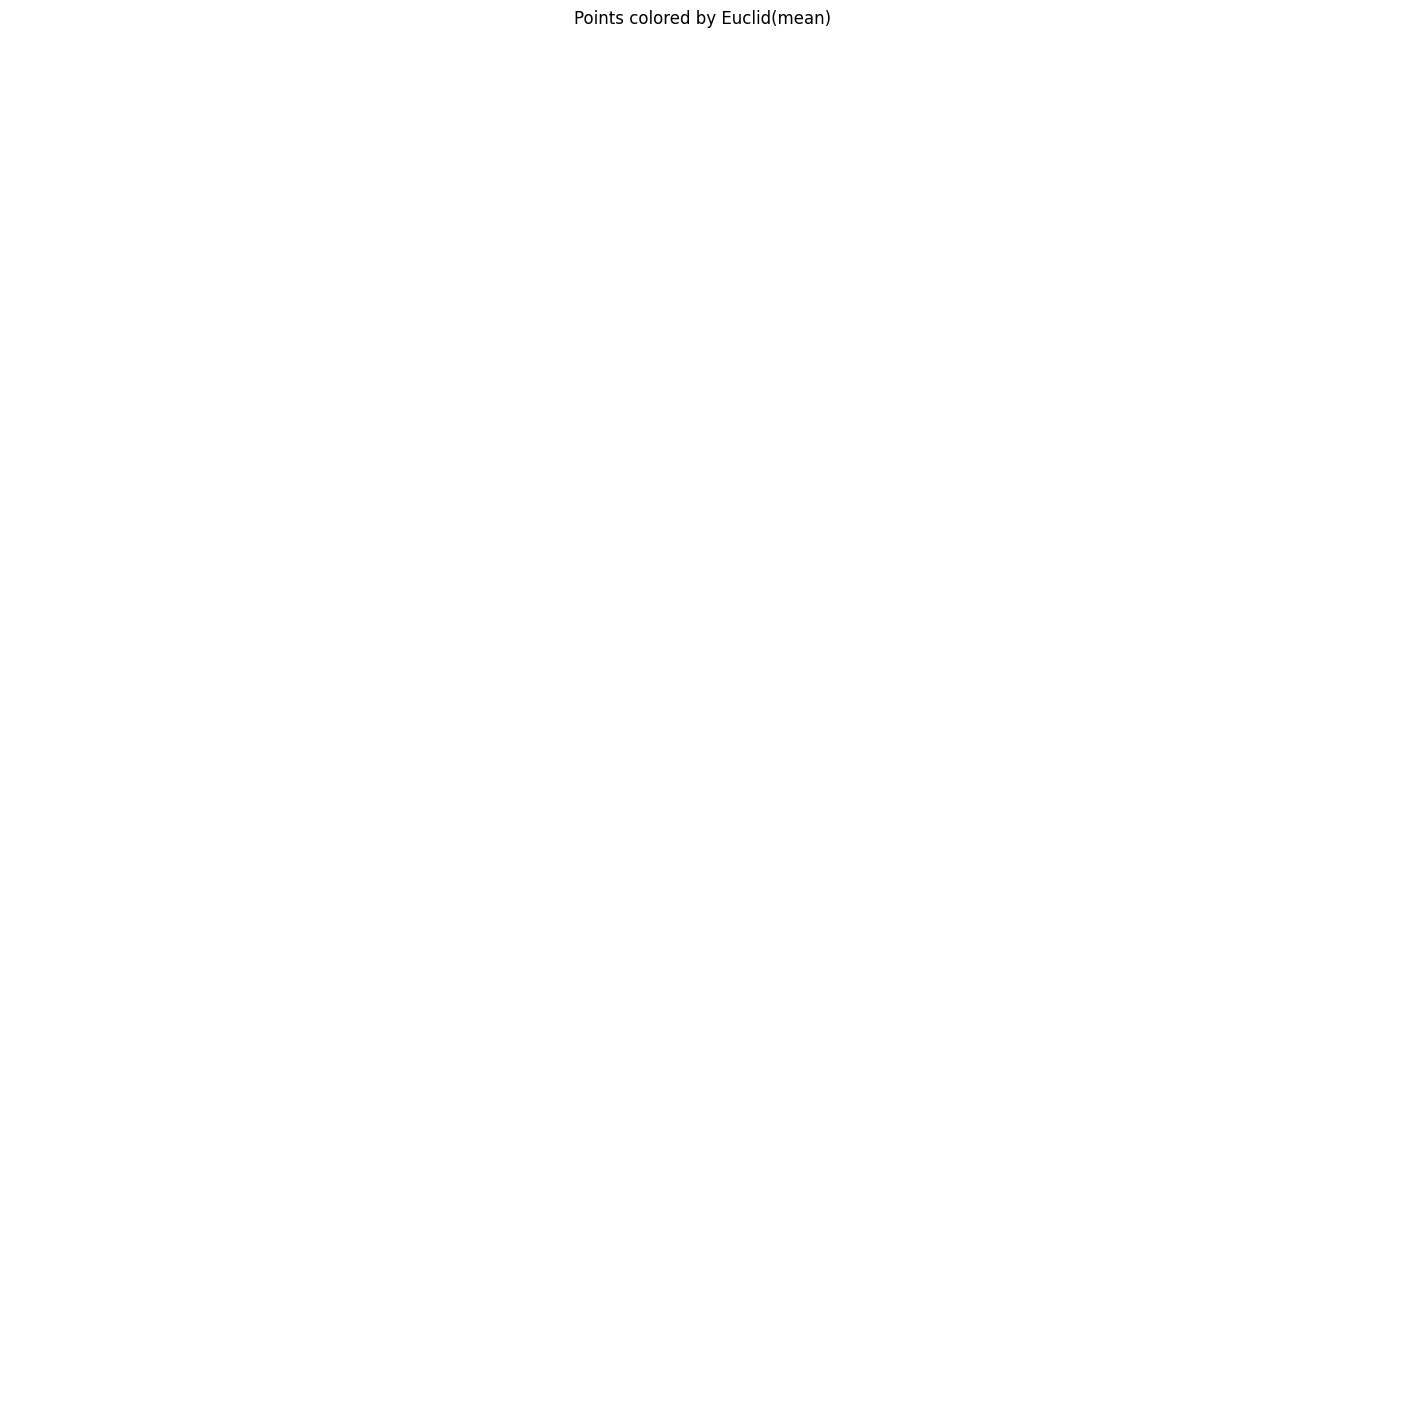

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors

# ------------------------------------------------------------------------
# 1) BUILD THE SIERPINSKI DATA
# ------------------------------------------------------------------------

def midpoint(A, B):
    return ((A[0] + B[0]) / 2.0, (A[1] + B[1]) / 2.0)

def subdivide_triangle(tri):
    """
    Given tri = (A,B,C),
    return the 3 corner sub‐triangles
    formed by connecting midpoints.
    """
    A, B, C = tri
    AB_mid = midpoint(A, B)
    BC_mid = midpoint(B, C)
    CA_mid = midpoint(C, A)
    return [
        (A, AB_mid, CA_mid),  # corner that includes A
        (B, BC_mid, AB_mid),  # corner that includes B
        (C, CA_mid, BC_mid)   # corner that includes C
    ]

def sierpinski_triangles_and_points(k):
    """
    Returns:
      triangles_by_iter[i] = list of sub‐triangles introduced at iteration i
      points_list = [(x, y, iterationOfAppearance), ...]
    """
    triangles_by_iter = {}
    point_appearance = {}

    # Iteration 1: one big triangle
    t0 = ((0,0), (1,0), (0.5, np.sqrt(3)/2))
    triangles_by_iter[1] = [t0]
    # Mark these 3 corners as "first appeared in iter=1"
    for corner in t0:
        point_appearance[corner] = 1

    # For each iteration > 1, subdivide the previous iteration's triangles
    for i in range(2, k+1):
        new_tris = []
        for tri in triangles_by_iter[i-1]:
            subs = subdivide_triangle(tri)
            new_tris.extend(subs)
            # Mark new midpoints as iteration i (if not seen before)
            for sub_t in subs:
                for corner in sub_t:
                    if corner not in point_appearance:
                        point_appearance[corner] = i
        triangles_by_iter[i] = new_tris

    # Build the full list of points
    points_list = [(p[0], p[1], it) for (p,it) in point_appearance.items()]
    return triangles_by_iter, points_list


# ------------------------------------------------------------------------
# 2) DISTANCES AND STATISTICS
# ------------------------------------------------------------------------

def distance_euclid(p1, p2):
    """distance between two points in 2D"""
    return np.sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)

def distance_manhattan(p1, p2):
    """distance defined by sum of absolute differences in each dimension"""
    return abs(p1[0] - p2[0]) + abs(p1[1] - p2[1])

def distance_minkowski(p1, p2, p=3):
    """distance defined by the Minkowski metric"""
    return (abs(p1[0]-p2[0])**p + abs(p1[1]-p2[1])**p)**(1.0/p)

def distance_aparicion(p1, p2):
    """Difference in iteration of appearance - not a real distance"""
    return abs(p1[2] - p2[2])

def compute_distance_data(points):
    """
    For each point i, compute distances to all others
    in these metrics: Euclid, Manhattan, Minkowski(p=3), Aparicion.
    Then store min, max, mean, median.
    Also define a 'iteracion' "metric" => the point's own iteration,
    so we can color by iteration directly.
    """
    dist_data = {}
    n = len(points)

    def stats(arr):
        arr_np = np.array(arr)
        return {
            'values': arr,
            'min': float(np.min(arr_np)) if len(arr_np)>0 else 0.0,
            'max': float(np.max(arr_np)) if len(arr_np)>0 else 0.0,
            'mean': float(np.mean(arr_np)) if len(arr_np)>0 else 0.0,
            'median': float(np.median(arr_np)) if len(arr_np)>0 else 0.0,
        }

    for i in range(n):
        p_i = points[i]
        dist_eu, dist_man, dist_mink, dist_ap = [], [], [], []
        for j in range(n):
            if i == j:
                continue
            p_j = points[j]
            dist_eu.append(distance_euclid(p_i, p_j))
            dist_man.append(distance_manhattan(p_i, p_j))
            dist_mink.append(distance_minkowski(p_i, p_j, p=3))
            dist_ap.append(distance_aparicion(p_i, p_j))
        
        # iteration metric => the point's own iteration
        iteration_value = p_i[2]
        iteration_stats = {
            'values': [iteration_value],
            'min': iteration_value,
            'max': iteration_value,
            'mean': iteration_value,
            'median': iteration_value,
        }
        
        dist_data[i] = {
            'point': p_i,
            'euclid':    stats(dist_eu),
            'manhattan': stats(dist_man),
            'minkowski': stats(dist_mink),
            'aparicion': stats(dist_ap),
            'iteracion': iteration_stats
        }
    return dist_data

# ------------------------------------------------------------------------
# 3) SHOW METRICS FOR A SPECIFIC POINT
# ------------------------------------------------------------------------

def show_metrics_for_point(dist_data, i):
    """
    Prints the stored distance stats for the point with index i.
    (Indices match the order in 'points_list'.)
    """
    if i not in dist_data:
        print(f"No data for point index {i}!")
        return
    p = dist_data[i]['point']  # (x, y, iteration)
    print(f"\nMetrics for point index={i} => coords=({p[0]:.3f}, {p[1]:.3f}), iteration={p[2]}")
    for m in ['euclid', 'manhattan', 'minkowski', 'aparicion', 'iteracion']:
        s = dist_data[i][m]
        print(f"  Metric: {m}")
        print(f"    min={s['min']:.3f}, max={s['max']:.3f}, mean={s['mean']:.3f}, median={s['median']:.3f}")
    print("------------------------------------------------")

# ------------------------------------------------------------------------
# 4) PLOT: FILL NEW TRIANGLES EACH ITERATION,
#    COLOR POINTS BY A METRIC
# ------------------------------------------------------------------------

def plot_filled_new_triangles(
    triangles_by_iter,
    points_list,
    dist_data,
    metric="euclid",
    stat="mean",
    title=None
):
    """
    - For each iteration i=1..k, fill in (with color_i)
      the sub‐triangles introduced at iteration i.
    - The points are colored by 'metric'('stat') in a scatter with a colorbar.
    - We add a legend showing which color belongs to iteration i.
    """
    if title is None:
        title = f"Sierpinski new triangles + Points color={metric}({stat})"

    fig, ax = plt.subplots(figsize=(18,18))
    ax.set_aspect("equal")
    ax.set_axis_off()
    ax.set_title(title)

    max_iter = max(triangles_by_iter.keys())
    # Discrete colormap for the triangles & possibly for points if metric="iteracion"
    cmap_iter = plt.cm.get_cmap('tab10', max_iter+1)

    # Fill the triangles iteration by iteration
    legend_handles = []
    for i in range(1, max_iter+1):
        tri_list = triangles_by_iter[i]
        if not tri_list:
            continue
        color_i = cmap_iter(i-1) # -1
        for tri in tri_list:
            A, B, C = tri
            polygon = mpatches.Polygon(
                [A, B, C],
                closed=True,
                facecolor=color_i,    # fill color
                edgecolor='black',    # outline
                linewidth=1.0,
                alpha=0.8
            )
            ax.add_patch(polygon)
        # We'll add a patch to the legend
        patch_for_legend = mpatches.Patch(facecolor=color_i, edgecolor='black',
                                          label=f"Iteration {i}")
        legend_handles.append(patch_for_legend)

    # Show a legend that maps iteration -> color
    ax.legend(handles=legend_handles, loc='upper right',
              title="Triangles by iteration")

    # 2) Plot the points
    arr_p = np.array(points_list)
    x, y = arr_p[:,0], arr_p[:,1]
    n_points = len(points_list)

    # If the metric is 'iteracion', use the iteration values
    # and the SAME colormap as the triangles, with discrete steps for 1..max_iter
    if metric == "iteracion":
        iteration_vals = np.array([p[2] for p in points_list], dtype=float)

        # We'll set up a discrete normalization so each iteration i uses exactly color_i = cmap_iter(i-1).
        # Boundaries are at 0.5, 1.5, 2.5, ... up to max_iter+0.5
        boundaries = np.arange(0.5, max_iter+1.5, 1.0)
        norm = mcolors.BoundaryNorm(boundaries, max_iter)

        sc = ax.scatter(
            x, y,
            c=iteration_vals,
            cmap=cmap_iter,
            norm=norm,
            edgecolors='k',
            s=40,
            zorder=5
        )

        # Build colorbar (discrete steps from 1..max_iter)
        cb = fig.colorbar(sc, ax=ax, boundaries=boundaries, spacing='proportional')
        cb.set_ticks(np.arange(1, max_iter+1))
        cb.set_ticklabels([str(i) for i in range(1, max_iter+1)])
        cb.set_label("iteracion (discrete)")

    else:
        # Otherwise, we color by the usual metric stats
        values = np.zeros(n_points)
        for idx in range(n_points):
            values[idx] = dist_data[idx][metric][stat]
        sc = ax.scatter(x, y, c=values, cmap='viridis',
                        edgecolors='k', s=40, zorder=5)
        cb = fig.colorbar(sc, ax=ax, shrink=0.7)
        cb.set_label(f"{metric}({stat})")

    plt.show()


def plot_filled_triangles_and_point_metric(
    triangles_by_iter,
    points_list,
    point_index=0,
    metric="euclid",
    p_mink=3,       # only relevant if metric="minkowski"
    title=None
):
    """
    Similar to 'plot_filled_new_triangles', except:
     - We STILL fill Sierpinski triangles by iteration.
     - We color each point by *its distance to the point with index=point_index*
       (under the chosen metric).
     - We highlight the reference point (point_index) with a special marker.
    """

    import matplotlib.patches as mpatches

    if title is None:
        title = f"Sierpinski + Distances from point #{point_index} in metric='{metric}'"

    fig, ax = plt.subplots(figsize=(18,18))
    ax.set_aspect("equal")
    ax.set_axis_off()
    ax.set_title(title)

    # 1) Fill the triangles by iteration (same discrete colormap approach)
    max_iter = max(triangles_by_iter.keys())
    cmap_iter = plt.cm.get_cmap('tab10', max_iter+1)

    legend_handles = []
    for i in range(1, max_iter+1):
        tri_list = triangles_by_iter[i]
        if not tri_list:
            continue
        color_i = cmap_iter(i)
        for tri in tri_list:
            A, B, C = tri
            polygon = mpatches.Polygon(
                [A, B, C],
                closed=True,
                facecolor=color_i,
                edgecolor='black',
                linewidth=1.0,
                alpha=0.6
            )
            ax.add_patch(polygon)
        patch_for_legend = mpatches.Patch(facecolor=color_i, edgecolor='black',
                                          label=f"Iteration {i}")
        legend_handles.append(patch_for_legend)

    ax.legend(handles=legend_handles, loc='upper right',
              title="Triangles by iteration")

    # 2) Color each point by the distance to the reference point

    def get_distance(pA, pB, metric, p=3):
        if metric == "euclid":
            return np.sqrt((pA[0]-pB[0])**2 + (pA[1]-pB[1])**2)
        elif metric == "manhattan":
            return abs(pA[0]-pB[0]) + abs(pA[1]-pB[1])
        elif metric == "minkowski":
            return ((abs(pA[0]-pB[0]))**p + (abs(pA[1]-pB[1]))**p)**(1.0/p)
        elif metric == "aparicion":
            # difference in iteration
            return abs(pA[2] - pB[2])
        else:
            # default to euclid
            return np.sqrt((pA[0]-pB[0])**2 + (pA[1]-pB[1])**2)

    arr_p = np.array(points_list)
    n_points = len(points_list)

    if point_index < 0 or point_index >= n_points:
        print(f"Invalid point_index={point_index}, must be in [0..{n_points-1}]")
        return

    # The reference point
    p_ref = points_list[point_index]  # (x, y, iteration)

    # Build a color array with distances from p_ref
    dist_vals = np.zeros(n_points, dtype=float)
    for i in range(n_points):
        if i == point_index:
            dist_vals[i] = 0.0
        else:
            dist_vals[i] = get_distance(p_ref, points_list[i], metric, p_mink)

    # We'll do a normal continuous scale for these distances
    x_coords = arr_p[:,0]
    y_coords = arr_p[:,1]

    sc = ax.scatter(x_coords, y_coords, c=dist_vals, cmap='viridis',
                    edgecolors='k', s=40, zorder=5)

    # highlight the reference point with a star
    ax.scatter(
        [p_ref[0]], [p_ref[1]],
        color='red', marker='*', s=200, edgecolors='yellow', linewidths=1.5, zorder=10
    )

    cb = fig.colorbar(sc, ax=ax, shrink=0.7)
    cb.set_label(f"Distance to point #{point_index} (metric={metric})")

    plt.show()



# GENERATION OF TRAINGLES


if __name__=="__main__":
    # Generate triangles
    K = 7 # set iterations
    triangles_by_iter, points_list = sierpinski_triangles_and_points(K)

    # Compute distances & stats
    dist_data = compute_distance_data(points_list)

    # Plot triangles + color points by euclid
    plot_filled_new_triangles(
        triangles_by_iter,
        points_list,
        dist_data,
        metric="euclid",
        stat="mean",
        title="Points colored by Euclid(mean)"
    )

    # Plot traingles + color points by aparicion
    plot_filled_new_triangles(
        triangles_by_iter,
        points_list,
        dist_data,
        metric="aparicion",
        stat="mean",
        title="Points colored by Aparicion(mean)"
    )

    # Plot triangles + color points by manhattan
    plot_filled_new_triangles(
        triangles_by_iter,
        points_list,
        dist_data,
        metric="manhattan",
        stat="mean",
        title="Points colored by Manhattan(mean)"
    )

    # Plot triangles + color points by minkowski
    plot_filled_new_triangles(
        triangles_by_iter,
        points_list,
        dist_data,
        metric="minkowski",
        stat="mean",
        title="Points colored by Minkowski(p=3)(mean)"
    )

    # Plot triangles (filled) + color points by 'iteracion' so they match the triangle colors
    plot_filled_new_triangles(
        triangles_by_iter,
        points_list,
        dist_data,
        metric="iteracion",
        stat="mean",  # 'min','max','median' are identical for 'iteracion'
        title="Points colored by iteration (matching triangle colors)"
    )

    # Plot for individual points (distances to a reference point)
    show_metrics_for_point(dist_data, i=0)
    plot_filled_triangles_and_point_metric(
        triangles_by_iter, points_list, point_index=0,
        metric="euclid",
        title="Distances from point #0 in 'euclid'"
    )

    show_metrics_for_point(dist_data, i=1)
    plot_filled_triangles_and_point_metric(
        triangles_by_iter, points_list, point_index=1,
        metric="manhattan",
        title="Distances from point #1 in 'manhattan'"
    )

    show_metrics_for_point(dist_data, i=2)
    plot_filled_triangles_and_point_metric(
        triangles_by_iter, points_list, point_index=2,
        metric="minkowski",
        title="Distances from point #2 in 'minkowski(p=3)'"
    )

